In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pathlib
import os
from scipy.stats import chi2_contingency
from datetime import date
import sys

In [2]:
PROJECT_ROOT = pathlib.Path.cwd().parent
DATA_FOLDER_PATH = PROJECT_ROOT / 'data'
RAW_DATA_PATH = DATA_FOLDER_PATH / 'raw'
PROCESSED_DATA_PATH = DATA_FOLDER_PATH / 'processed'
RAW_TRAIN_FILE_PATH = RAW_DATA_PATH / 'Train.csv'
RAW_TEST_FILE_PATH = RAW_DATA_PATH / 'Test.csv'
PROCESSED_TRAIN_FILE_PATH = PROCESSED_DATA_PATH / 'train_eco_added.csv'
ECONOMIC_INDICATOR_FILE = RAW_DATA_PATH / 'economic_indicators.csv'
SUBMISSION_PATH = DATA_FOLDER_PATH / 'submission'

In [3]:
sys.path.append(str(PROJECT_ROOT))

In [4]:
from africa_loan_defaulting import preprocessing_util_functions

In [3]:
train_df = pd.read_csv(RAW_TRAIN_FILE_PATH)
train_df

,ID,customer_id,country_id,tbl_loan_id,lender_id,loan_type,Total_Amount,Total_Amount_to_Repay,disbursement_date,due_date,duration,New_versus_Repeat,Amount_Funded_By_Lender,Lender_portion_Funded,Lender_portion_to_be_repaid,target
0,ID_266671248032267278,266671,Kenya,248032,267278,Type_1,8448.0,8448.0,2022-08-30,2022-09-06,7,Repeat Loan,120.85,0.014305,121.0,0
1,ID_248919228515267278,248919,Kenya,228515,267278,Type_1,25895.0,25979.0,2022-07-30,2022-08-06,7,Repeat Loan,7768.50,0.300000,7794.0,0
2,ID_308486370501251804,308486,Kenya,370501,251804,Type_7,6900.0,7142.0,2024-09-06,2024-09-13,7,Repeat Loan,1380.00,0.200000,1428.0,0
3,ID_266004285009267278,266004,Kenya,285009,267278,Type_1,8958.0,9233.0,2022-10-20,2022-10-27,7,Repeat Loan,2687.40,0.300000,2770.0,0
4,ID_253803305312267278,253803,Kenya,305312,267278,Type_1,4564.0,4728.0,2022-11-28,2022-12-05,7,Repeat Loan,1369.20,0.300000,1418.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68649,ID_244559228408267278,244559,Kenya,228408,267278,Type_1,1460.0,1515.0,2022-07-30,2022-08-06,7,Repeat Loan,438.00,0.300000,455.0,0
68650,ID_260062217784267278,260062,Kenya,217784,267278,Type_1,5029.0,5116.0,2022-07-16,2022-07-23,7,Repeat Loan,1508.70,0.300000,1535.0,0
68651,ID_259137216701267278,259137,Kenya,216701,267278,Type_1,5289.0,5289.0,2022-07-15,2022-07-22,7,Repeat Loan,1586.70,0.300000,1587.0,0
68652,ID_266801303201267278,266801,Kenya,303201,267278,Type_1,3334.0,3334.0,2022-11-23,2022-11-30,7,Repeat Loan,741.09,0.222283,741.0,0


In [4]:
economic_indicators_df = pd.read_csv(ECONOMIC_INDICATOR_FILE)
economic_indicators_df

,Country,Indicator,YR2001,YR2002,YR2003,YR2004,YR2005,YR2006,YR2007,YR2008,...,YR2014,YR2015,YR2016,YR2017,YR2018,YR2019,YR2020,YR2021,YR2022,YR2023
0,Ghana,"Inflation, consumer prices (annual %)",41.509496,9.360932,29.772980,18.042739,15.438992,11.679184,10.734267,16.494640,...,15.489616,17.149970,17.454635,12.371922,7.808765,7.143640,9.887290,9.971089,31.255895,38.106966
1,Cote d'Ivoire,"Inflation, consumer prices (annual %)",4.361529,3.077265,3.296807,1.457988,3.885830,2.467191,1.892006,6.308528,...,0.448682,1.251500,0.723178,0.685881,0.359409,-1.106863,2.425007,4.091952,5.276167,4.387117
2,Kenya,"Inflation, consumer prices (annual %)",5.738598,1.961308,9.815691,11.624036,10.312778,14.453734,9.758880,26.239817,...,6.878155,6.582154,6.297250,8.005650,4.689806,5.239638,5.405162,6.107936,7.659863,7.671396
3,Ghana,"Official exchange rate (LCU per US$, period av...",0.716305,0.792417,0.866764,0.899495,0.905209,0.915107,0.932619,1.052275,...,2.896575,3.714642,3.909817,4.350533,4.585325,5.217367,5.595708,5.805700,8.272400,11.020408
4,Cote d'Ivoire,"Official exchange rate (LCU per US$, period av...",732.397693,693.713226,579.897426,527.338032,527.258363,522.425625,478.633718,446.000041,...,493.757330,591.211698,592.605615,580.656750,555.446458,585.911013,575.586005,554.530675,623.759701,606.569750
5,Kenya,"Official exchange rate (LCU per US$, period av...",78.563195,78.749142,75.935569,79.173876,75.554109,72.100835,67.317638,69.175320,...,87.922164,98.178453,101.504369,103.410005,101.301574,101.991298,106.450780,109.637747,117.865989,139.846384
6,Ghana,Real interest rate (%),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,Cote d'Ivoire,Real interest rate (%),NaN,NaN,NaN,NaN,5.763991,3.331831,1.613290,-0.368944,...,0.891701,0.361233,6.552137,6.246748,NaN,NaN,NaN,NaN,NaN,NaN
8,Kenya,Real interest rate (%),17.812501,17.358141,9.770511,5.045258,7.609988,-8.009867,4.819091,-0.984997,...,8.249079,6.268806,10.118129,5.656748,8.487960,7.831101,6.714634,7.427581,5.968447,6.546517
9,Ghana,Average precipitation in depth (mm per year),1187.000000,1187.000000,1187.000000,1187.000000,1187.000000,1187.000000,1187.000000,1187.000000,...,1187.000000,1187.000000,1187.000000,1187.000000,1187.000000,1187.000000,1187.000000,1187.000000,1187.000000,1187.000000


In [5]:
economic_indicators_df.loc[(economic_indicators_df['Country']=='Ghana') & (economic_indicators_df['Indicator']=='Inflation, consumer prices (annual %)')]

,Country,Indicator,YR2001,YR2002,YR2003,YR2004,YR2005,YR2006,YR2007,YR2008,...,YR2014,YR2015,YR2016,YR2017,YR2018,YR2019,YR2020,YR2021,YR2022,YR2023
0,Ghana,"Inflation, consumer prices (annual %)",41.509496,9.360932,29.77298,18.042739,15.438992,11.679184,10.734267,16.49464,...,15.489616,17.14997,17.454635,12.371922,7.808765,7.14364,9.88729,9.971089,31.255895,38.106966


In [6]:
economic_indicators_df['Indicator'].unique()

array(['Inflation, consumer prices (annual %)',
       'Official exchange rate (LCU per US$, period average)',
       'Real interest rate (%)',
       'Average precipitation in depth (mm per year)',
       'Deposit interest rate (%)', 'Lending interest rate (%)',
       'Interest rate spread (lending rate minus deposit rate, %)',
       'Fossil fuel energy consumption (% of total)', 'Unemployment rate'],
      dtype=object)

In [48]:
def add_economic_indicators_row(row, economic_indicators):
    #print(row)
    country = row.country_id
    disbursement_date = date.fromisoformat(row.disbursement_date)

    economic_indicators_dict = {f'{indicator}': economic_indicators.loc[(economic_indicators['Country'] == country) & (economic_indicators['Indicator'] == indicator), 'YR'+str(disbursement_date.year)].item()
                                for indicator in economic_indicators['Indicator'].unique()}
    return economic_indicators_dict


def add_economic_indicators(df, economic_indcators):
    new_df_list = []
    for row in df.itertuples():
        new_df_list.append(add_economic_indicators_row(row, economic_indcators))
    return pd.DataFrame(new_df_list)

In [8]:
economic_indicators_df = preprocessing_util_functions.remove_economic_indicators(economic_indicators_df)
economic_indicators_df = preprocessing_util_functions.add_2024_economic_indicators(economic_indicators_df)
economic_indicators_df

C:\Users\shubham mate\Desktop\Programming\Python\Africa Loan Defaulting\preprocessing_util_functions.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  economic_indicators['YR2024'] = np.zeros(economic_indicators.shape[0])


,Country,Indicator,YR2001,YR2002,YR2003,YR2004,YR2005,YR2006,YR2007,YR2008,...,YR2015,YR2016,YR2017,YR2018,YR2019,YR2020,YR2021,YR2022,YR2023,YR2024
0,Ghana,"Inflation, consumer prices (annual %)",41.509496,9.360932,29.772980,18.042739,15.438992,11.679184,10.734267,16.494640,...,17.149970,17.454635,12.371922,7.808765,7.143640,9.887290,9.971089,31.255895,38.106966,19.530
1,Cote d'Ivoire,"Inflation, consumer prices (annual %)",4.361529,3.077265,3.296807,1.457988,3.885830,2.467191,1.892006,6.308528,...,1.251500,0.723178,0.685881,0.359409,-1.106863,2.425007,4.091952,5.276167,4.387117,3.800
2,Kenya,"Inflation, consumer prices (annual %)",5.738598,1.961308,9.815691,11.624036,10.312778,14.453734,9.758880,26.239817,...,6.582154,6.297250,8.005650,4.689806,5.239638,5.405162,6.107936,7.659863,7.671396,4.300
3,Ghana,"Official exchange rate (LCU per US$, period av...",0.716305,0.792417,0.866764,0.899495,0.905209,0.915107,0.932619,1.052275,...,3.714642,3.909817,4.350533,4.585325,5.217367,5.595708,5.805700,8.272400,11.020408,15.050
4,Cote d'Ivoire,"Official exchange rate (LCU per US$, period av...",732.397693,693.713226,579.897426,527.338032,527.258363,522.425625,478.633718,446.000041,...,591.211698,592.605615,580.656750,555.446458,585.911013,575.586005,554.530675,623.759701,606.569750,600.395
5,Kenya,"Official exchange rate (LCU per US$, period av...",78.563195,78.749142,75.935569,79.173876,75.554109,72.100835,67.317638,69.175320,...,98.178453,101.504369,103.410005,101.301574,101.991298,106.450780,109.637747,117.865989,139.846384,128.250
9,Ghana,Average precipitation in depth (mm per year),1187.000000,1187.000000,1187.000000,1187.000000,1187.000000,1187.000000,1187.000000,1187.000000,...,1187.000000,1187.000000,1187.000000,1187.000000,1187.000000,1187.000000,1187.000000,1187.000000,1187.000000,1187.000
10,Cote d'Ivoire,Average precipitation in depth (mm per year),1348.000000,1348.000000,1348.000000,1348.000000,1348.000000,1348.000000,1348.000000,1348.000000,...,1348.000000,1348.000000,1348.000000,1348.000000,1348.000000,1348.000000,1348.000000,1348.000000,1348.000000,1348.000
11,Kenya,Average precipitation in depth (mm per year),630.000000,630.000000,630.000000,630.000000,630.000000,630.000000,630.000000,630.000000,...,630.000000,630.000000,630.000000,630.000000,630.000000,630.000000,630.000000,630.000000,630.000000,630.000
24,Ghana,Unemployment rate,9.604000,8.698000,7.722000,6.757000,5.817000,4.897000,5.092000,5.142000,...,6.806000,5.237000,3.369000,3.251000,3.156000,3.285000,3.338000,3.084000,3.079000,4.000


In [49]:
economic_indicators_df_to_be_added = add_economic_indicators(train_df, economic_indicators_df)

In [50]:
economic_indicators_df_to_be_added

,"Inflation, consumer prices (annual %)","Official exchange rate (LCU per US$, period average)",Average precipitation in depth (mm per year),Unemployment rate
0,7.659863,117.865989,630.0,5.805
1,7.659863,117.865989,630.0,5.805
2,4.300000,128.250000,630.0,5.700
3,7.659863,117.865989,630.0,5.805
4,7.659863,117.865989,630.0,5.805
...,...,...,...,...
68649,7.659863,117.865989,630.0,5.805
68650,7.659863,117.865989,630.0,5.805
68651,7.659863,117.865989,630.0,5.805
68652,7.659863,117.865989,630.0,5.805


In [40]:
pd.concat([train_df, economic_indicators_df_to_be_added], axis=1).to_csv('data/train_eco_added.csv')

In [5]:
train_df = pd.read_csv(PROCESSED_TRAIN_FILE_PATH)

# Remove Useless Columns and ID columns
train_df = train_df.drop(['Unnamed: 0', 'customer_id', 'tbl_loan_id', 'lender_id'], axis=1)
train_df

,ID,country_id,loan_type,Total_Amount,Total_Amount_to_Repay,disbursement_date,due_date,duration,New_versus_Repeat,Amount_Funded_By_Lender,Lender_portion_Funded,Lender_portion_to_be_repaid,target,"Inflation, consumer prices (annual %)","Official exchange rate (LCU per US$, period average)",Average precipitation in depth (mm per year),Unemployment rate
0,ID_266671248032267278,Kenya,Type_1,8448.0,8448.0,2022-08-30,2022-09-06,7,Repeat Loan,120.85,0.014305,121.0,0,7.659863,117.865989,630.0,5.805
1,ID_248919228515267278,Kenya,Type_1,25895.0,25979.0,2022-07-30,2022-08-06,7,Repeat Loan,7768.50,0.300000,7794.0,0,7.659863,117.865989,630.0,5.805
2,ID_308486370501251804,Kenya,Type_7,6900.0,7142.0,2024-09-06,2024-09-13,7,Repeat Loan,1380.00,0.200000,1428.0,0,4.300000,128.250000,630.0,5.700
3,ID_266004285009267278,Kenya,Type_1,8958.0,9233.0,2022-10-20,2022-10-27,7,Repeat Loan,2687.40,0.300000,2770.0,0,7.659863,117.865989,630.0,5.805
4,ID_253803305312267278,Kenya,Type_1,4564.0,4728.0,2022-11-28,2022-12-05,7,Repeat Loan,1369.20,0.300000,1418.0,0,7.659863,117.865989,630.0,5.805
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68649,ID_244559228408267278,Kenya,Type_1,1460.0,1515.0,2022-07-30,2022-08-06,7,Repeat Loan,438.00,0.300000,455.0,0,7.659863,117.865989,630.0,5.805
68650,ID_260062217784267278,Kenya,Type_1,5029.0,5116.0,2022-07-16,2022-07-23,7,Repeat Loan,1508.70,0.300000,1535.0,0,7.659863,117.865989,630.0,5.805
68651,ID_259137216701267278,Kenya,Type_1,5289.0,5289.0,2022-07-15,2022-07-22,7,Repeat Loan,1586.70,0.300000,1587.0,0,7.659863,117.865989,630.0,5.805
68652,ID_266801303201267278,Kenya,Type_1,3334.0,3334.0,2022-11-23,2022-11-30,7,Repeat Loan,741.09,0.222283,741.0,0,7.659863,117.865989,630.0,5.805


In [6]:
NUMERICAL_COLUMNS = ['Total_Amount', 'Total_Amount_to_Repay',
                     'duration', 'Amount_Funded_By_Lender',
                     'Lender_portion_Funded', 'Lender_portion_to_be_repaid']

CATEGORICAL_COLUMNS = ['country_id', 'loan_type', 'New_versus_Repeat']

TARGET_COLUMN = 'target'

# Exploratory Data Analysis

## Univariate Analysis

### Numerical Variables

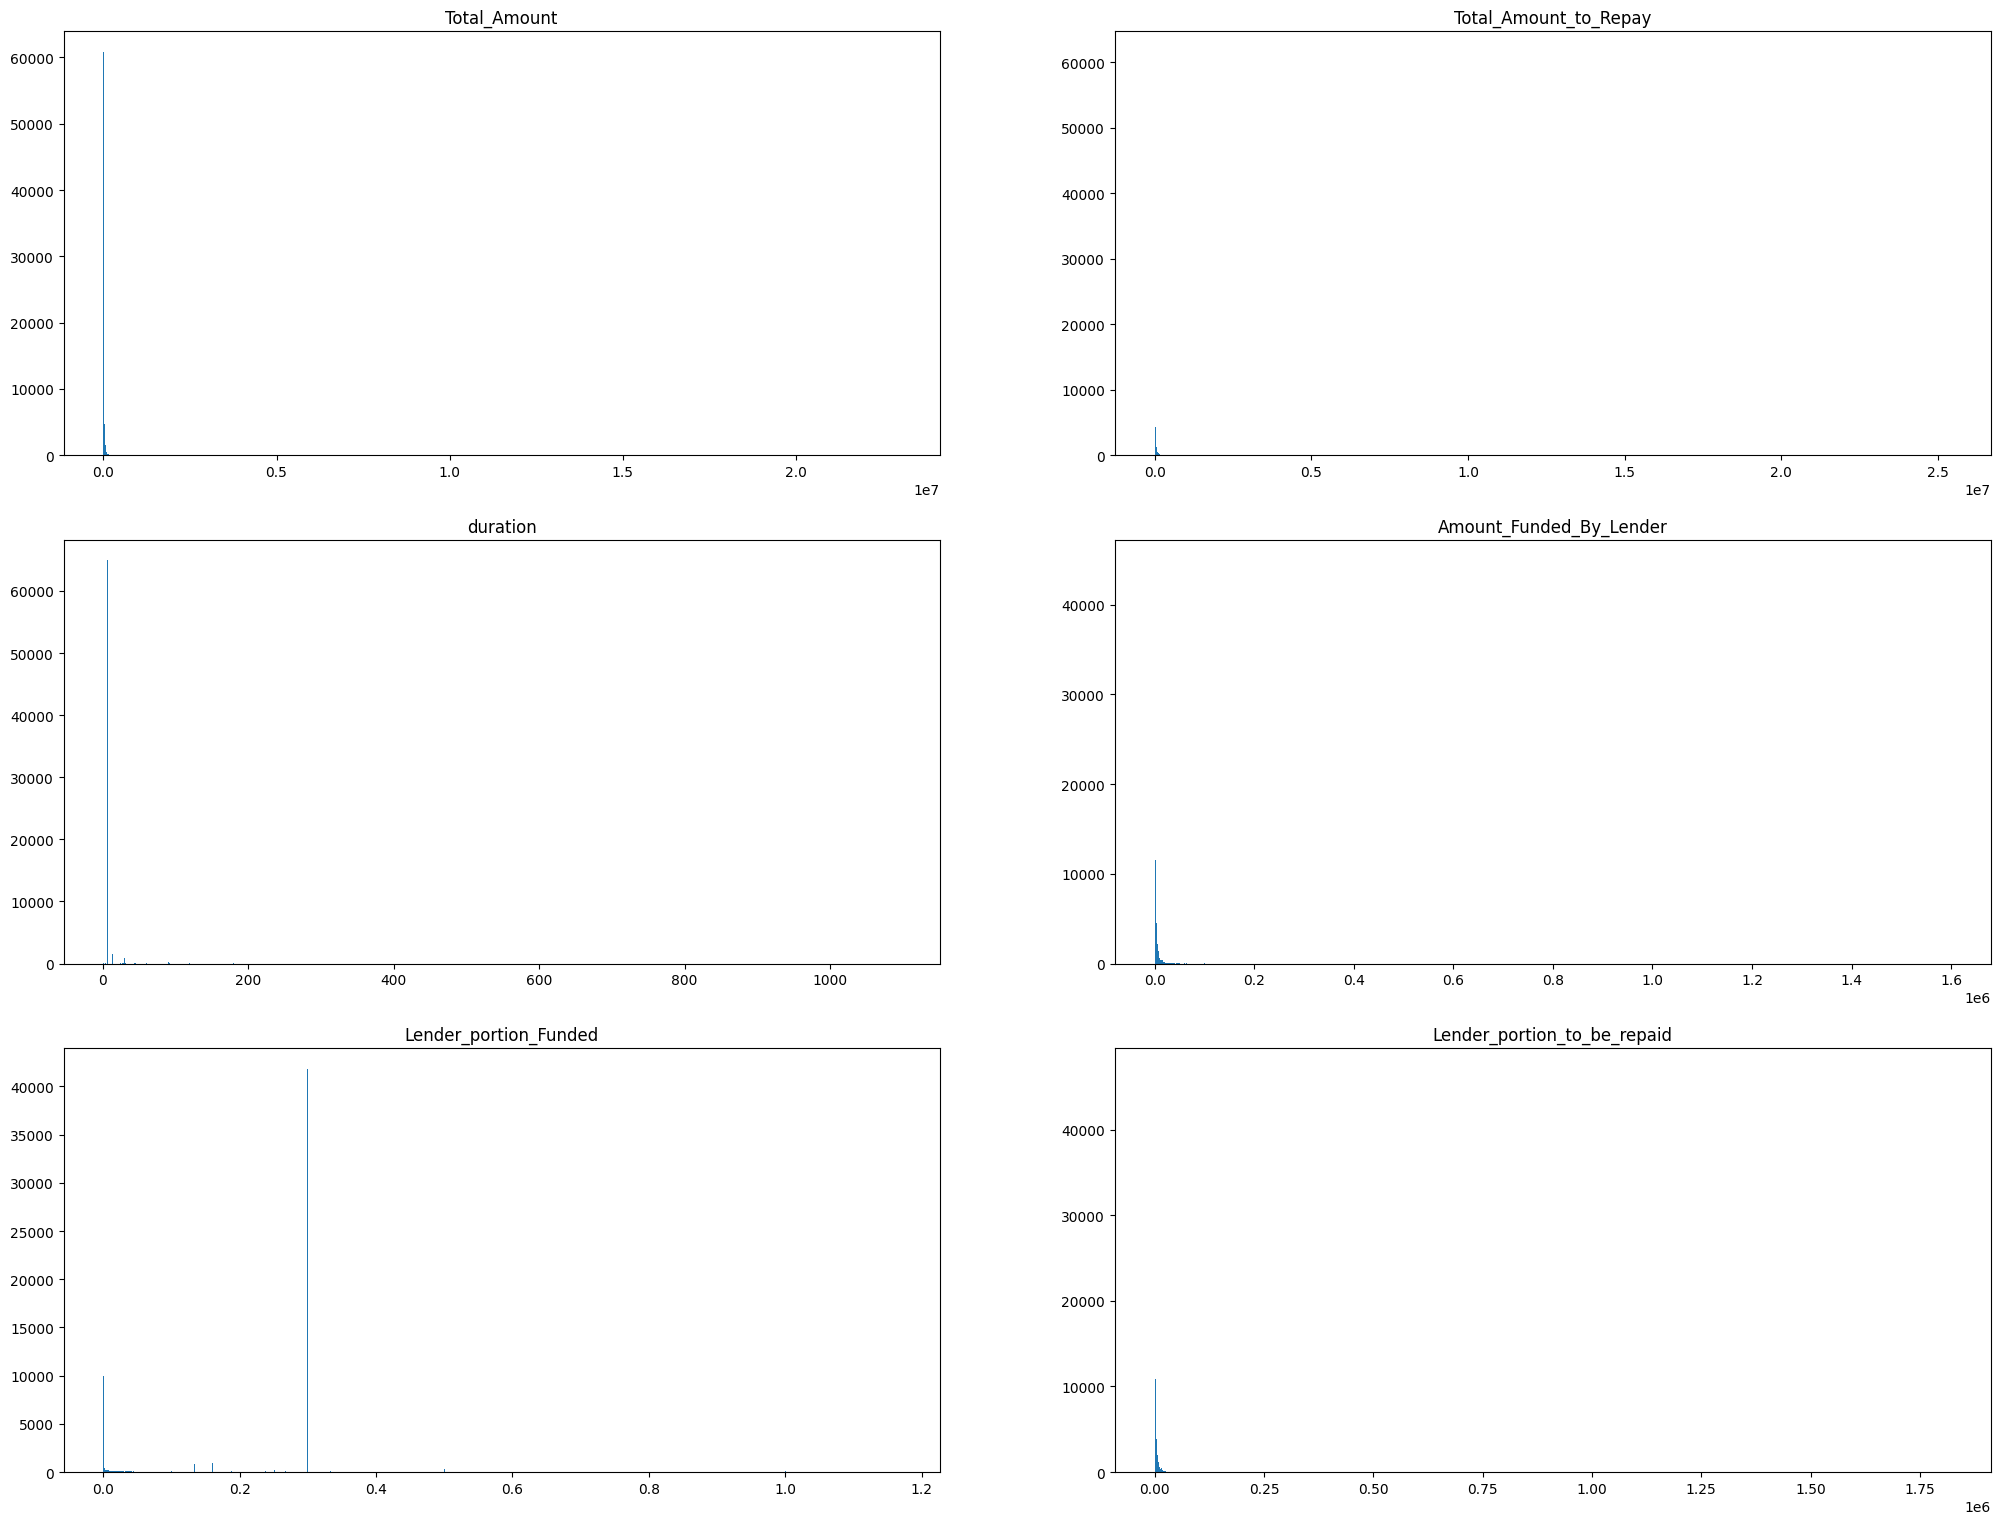

In [5]:
# Histogram Plot

fig, ax = plt.subplots(ncols=2, nrows=int(len(NUMERICAL_COLUMNS)/2), figsize=(20, 15))
fig.tight_layout()
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.2, hspace=0.2)

for i, col in enumerate(NUMERICAL_COLUMNS):
    ax[int(i/2), i%2].hist(train_df[col], bins=1000)
    ax[int(i/2), i%2].set_title(col)

plt.show()

In [7]:
train_df[NUMERICAL_COLUMNS].describe().apply(lambda s: s.apply('{0:.5f}'.format))

,Total_Amount,Total_Amount_to_Repay,duration,Amount_Funded_By_Lender,Lender_portion_Funded,Lender_portion_to_be_repaid
count,68654.00000,68654.00000,68654.00000,68654.00000,68654.00000,68654.00000
mean,14836.82862,15639.92990,8.54459,2545.66320,0.21868,2652.62149
std,141649.86839,165078.35283,13.34314,11922.72417,0.12983,13380.06354
min,2.00000,0.00000,1.00000,0.00000,0.00000,0.00000
25%,2295.00000,2329.00000,7.00000,234.00000,0.11871,239.00000
50%,5249.00000,5325.00000,7.00000,915.00000,0.30000,934.00000
75%,11450.00000,11650.00000,7.00000,2272.65000,0.30000,2317.00000
max,23000000.00000,25415000.00000,1096.00000,1600000.00000,1.16812,1821338.00000


In [8]:
train_df[train_df['Total_Amount_to_Repay'] == 0]

,ID,country_id,loan_type,Total_Amount,Total_Amount_to_Repay,disbursement_date,due_date,duration,New_versus_Repeat,Amount_Funded_By_Lender,Lender_portion_Funded,Lender_portion_to_be_repaid,target,"Inflation, consumer prices (annual %)","Official exchange rate (LCU per US$, period average)",Average precipitation in depth (mm per year),Unemployment rate
14942,ID_259525295227267278,Kenya,Type_1,2259.0,0.0,2022-11-07,2022-11-14,7,Repeat Loan,677.7,0.300,678.0,0,7.659863,117.865989,630.0,5.805
46044,ID_248700232519251804,Kenya,Type_13,500.0,0.0,2022-08-05,2022-09-04,30,Repeat Loan,133.0,0.266,142.0,0,7.659863,117.865989,630.0,5.805
58838,ID_262903231904267278,Kenya,Type_1,290.0,0.0,2022-08-04,2022-08-11,7,Repeat Loan,87.0,0.300,92.0,0,7.659863,117.865989,630.0,5.805


In [9]:
train_df['duration'].value_counts()

duration
7      64973
14      1567
30       958
90       249
60       201
       ...  
905        1
16         1
153        1
9          1
243        1
Name: count, Length: 64, dtype: int64

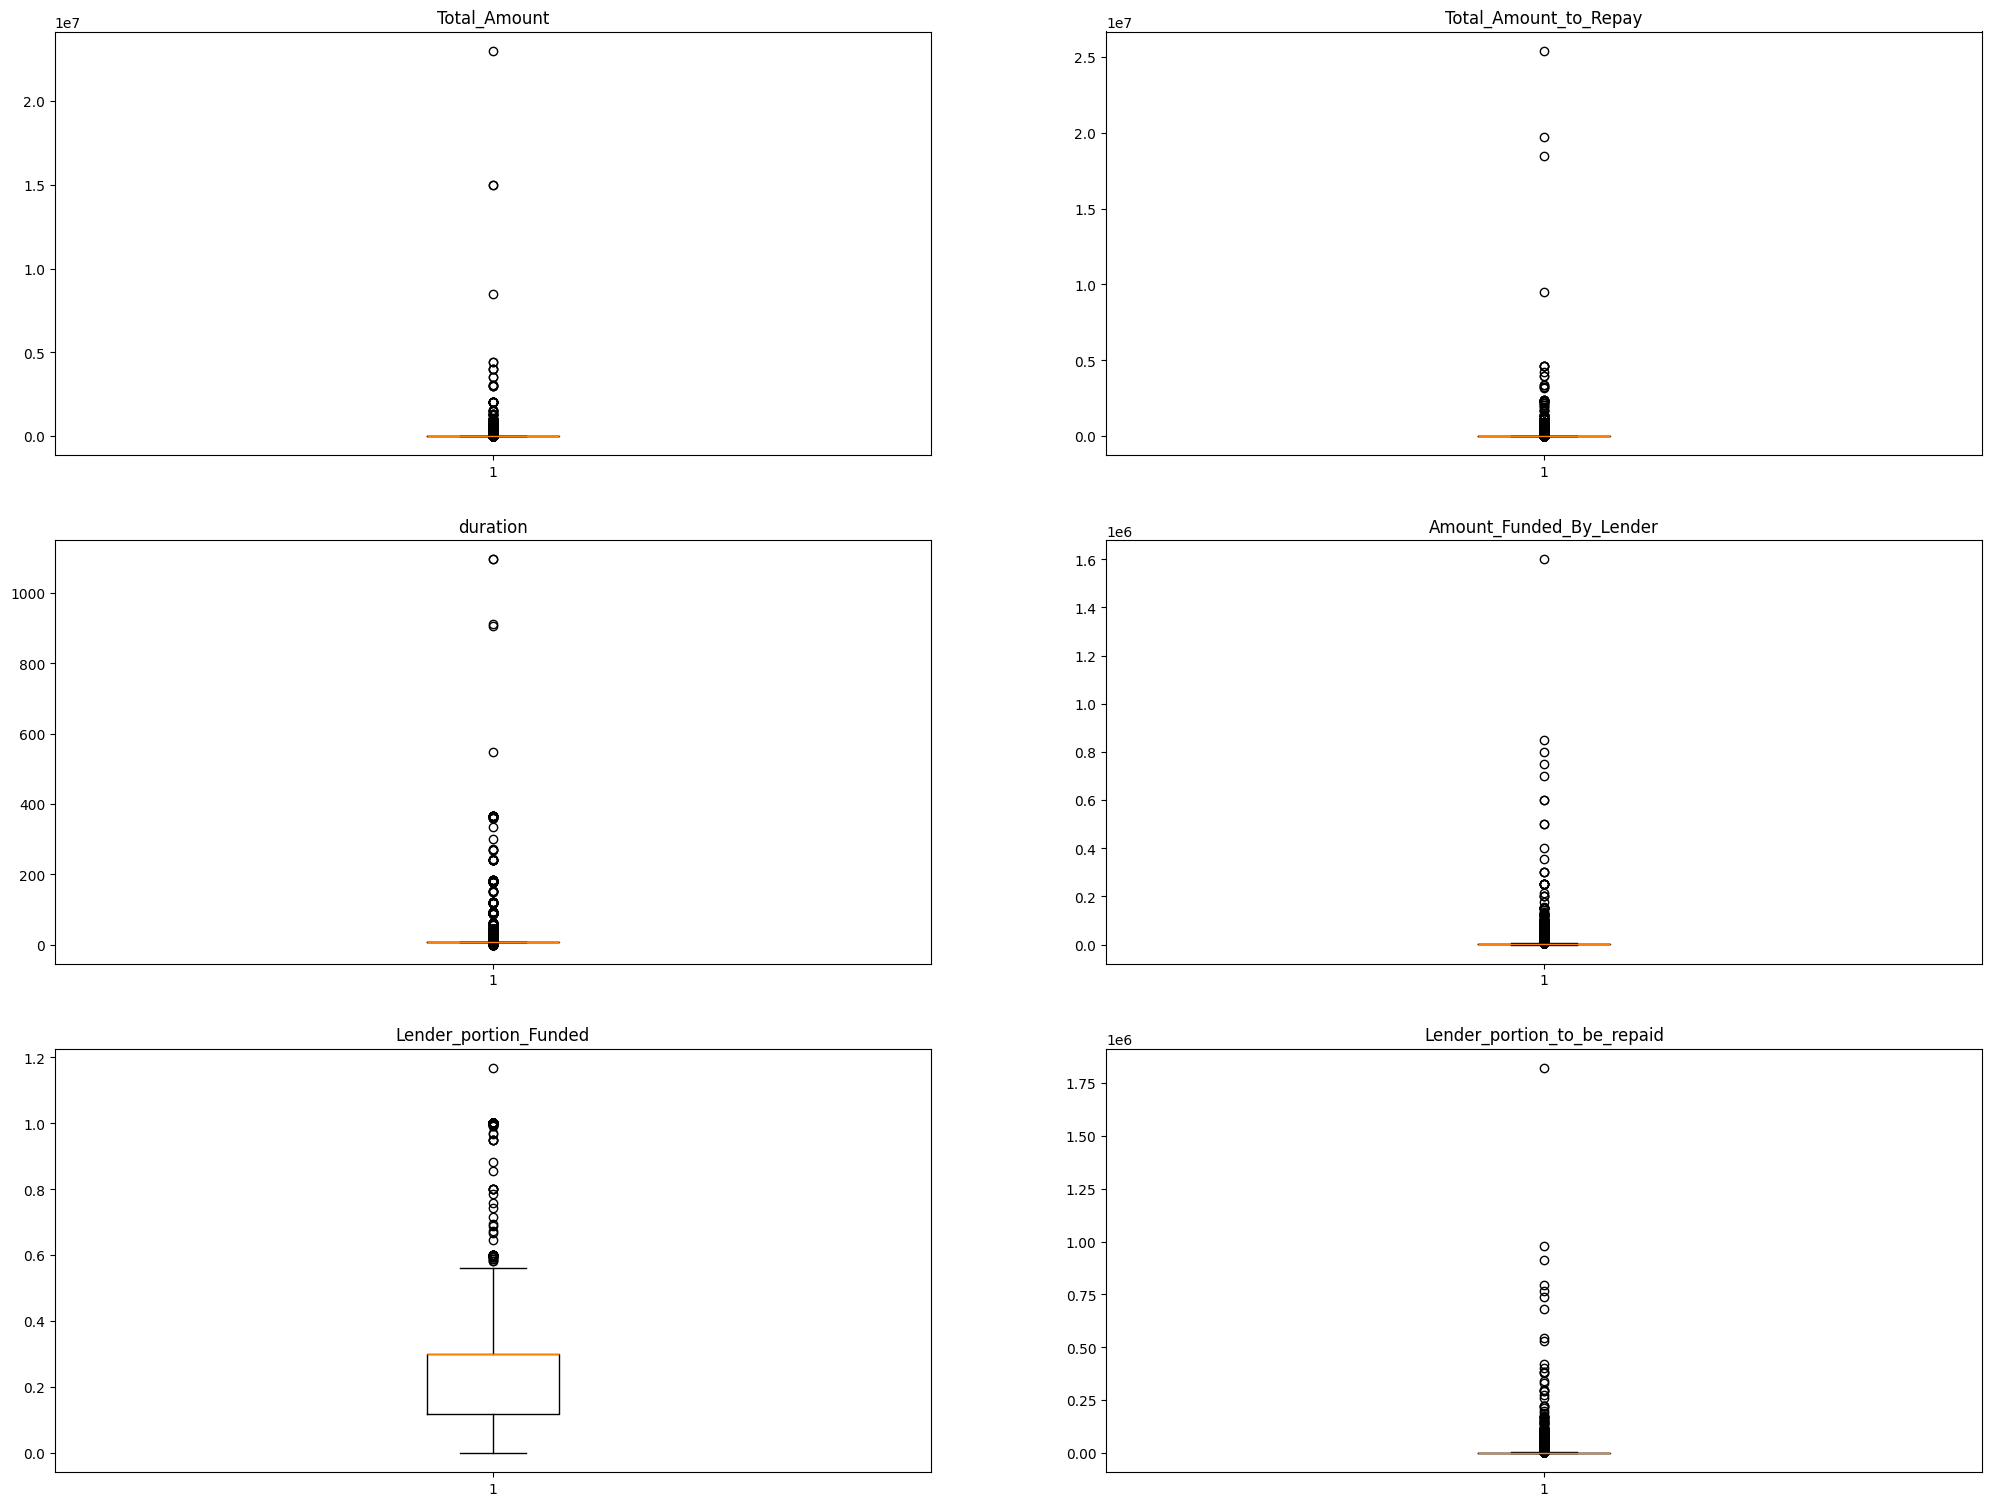

In [10]:
# Violin Plot

fig, ax = plt.subplots(ncols=2, nrows=int(len(NUMERICAL_COLUMNS)/2), figsize=(20, 15))
fig.tight_layout()
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.2, hspace=0.2)

for i, col in enumerate(NUMERICAL_COLUMNS):
    ax[int(i/2), i%2].boxplot(train_df[col])
    ax[int(i/2), i%2].set_title(col)

plt.show()

In [11]:
train_df[train_df['Total_Amount']>0.01e7]

,ID,country_id,loan_type,Total_Amount,Total_Amount_to_Repay,disbursement_date,due_date,duration,New_versus_Repeat,Amount_Funded_By_Lender,Lender_portion_Funded,Lender_portion_to_be_repaid,target,"Inflation, consumer prices (annual %)","Official exchange rate (LCU per US$, period average)",Average precipitation in depth (mm per year),Unemployment rate
455,ID_273698360408251804,Kenya,Type_4,150000.00,172500.00,2023-10-30,2024-01-28,90,Repeat Loan,37500.00,0.250000,43125.0,0,7.671396,139.846384,630.0,5.682
503,ID_272658288728251804,Kenya,Type_19,1542000.00,2374900.00,2022-10-27,2025-10-27,1096,Repeat Loan,250000.00,0.162127,385040.0,0,7.659863,117.865989,630.0,5.805
550,ID_267236186485267278,Kenya,Type_4,700000.00,794500.00,2022-06-09,2022-09-07,90,Repeat Loan,93333.00,0.133333,105933.0,0,7.659863,117.865989,630.0,5.805
603,ID_259835204259267278,Kenya,Type_10,839507.95,852100.57,2022-07-01,2022-07-31,30,Repeat Loan,60451.00,0.072008,61358.0,0,7.659863,117.865989,630.0,5.805
683,ID_259729296003267278,Kenya,Type_1,243685.00,243685.00,2022-11-08,2022-11-15,7,Repeat Loan,13449.11,0.055191,13449.0,0,7.659863,117.865989,630.0,5.805
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68440,ID_249352360538251804,Kenya,Type_4,210000.00,231105.00,2023-11-09,2024-02-07,90,Repeat Loan,45019.19,0.214377,49544.0,0,7.671396,139.846384,630.0,5.682
68449,ID_265047262602251804,Kenya,Type_4,1000000.00,1135000.00,2022-09-20,2022-12-20,91,Repeat Loan,50000.00,0.050000,56750.0,0,7.659863,117.865989,630.0,5.805
68471,ID_240678260190267278,Kenya,Type_1,128180.00,128180.00,2022-09-16,2022-09-23,7,Repeat Loan,38454.00,0.300000,38454.0,0,7.659863,117.865989,630.0,5.805
68480,ID_261841306863251804,Kenya,Type_10,144464.00,146630.96,2023-03-08,2023-03-31,23,Repeat Loan,25180.00,0.174299,25558.0,0,7.671396,139.846384,630.0,5.682


In [33]:
train_df[train_df['Total_Amount_to_Repay'] < train_df['Total_Amount']]

,ID,country_id,loan_type,Total_Amount,Total_Amount_to_Repay,disbursement_date,due_date,duration,New_versus_Repeat,Amount_Funded_By_Lender,Lender_portion_Funded,Lender_portion_to_be_repaid,target,"Inflation, consumer prices (annual %)","Official exchange rate (LCU per US$, period average)",Average precipitation in depth (mm per year),Unemployment rate,Total_Amount (in $)
70,ID_260863236259267278,Kenya,Type_1,949.0,932.00,2022-08-13,2022-08-20,7,Repeat Loan,284.70,0.300000,287.0,0,7.659863,117.865989,630.0,5.805,8.051517
726,ID_259843306527251804,Kenya,Type_10,246150.0,207624.25,2023-02-01,2023-02-28,27,Repeat Loan,21683.00,0.088089,22008.0,0,7.671396,139.846384,630.0,5.682,1760.145621
911,ID_271535263157267278,Kenya,Type_5,300.0,299.50,2022-09-19,2022-09-26,7,Repeat Loan,48.00,0.160000,66.0,0,7.659863,117.865989,630.0,5.805,2.545263
1763,ID_256566235585267278,Kenya,Type_1,870.0,857.00,2022-08-12,2022-08-19,7,Repeat Loan,261.00,0.300000,266.0,0,7.659863,117.865989,630.0,5.805,7.381264
3843,ID_267330230417267278,Kenya,Type_1,7497.0,6327.00,2022-08-02,2022-08-09,7,Repeat Loan,2249.10,0.300000,2346.0,0,7.659863,117.865989,630.0,5.805,63.606135
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65373,ID_253056294494267278,Kenya,Type_1,8978.0,8623.00,2022-11-05,2022-11-12,7,Repeat Loan,589.95,0.065711,608.0,0,7.659863,117.865989,630.0,5.805,76.171252
66143,ID_251047235981267278,Kenya,Type_1,3730.0,3708.00,2022-08-12,2022-08-19,7,Repeat Loan,1119.00,0.300000,1135.0,0,7.659863,117.865989,630.0,5.805,31.646109
66196,ID_256830254868267278,Kenya,Type_1,22595.0,21489.00,2022-09-08,2022-09-15,7,Repeat Loan,6778.50,0.300000,6902.0,0,7.659863,117.865989,630.0,5.805,191.700762
66537,ID_245733257961267278,Kenya,Type_1,5168.0,4700.00,2022-09-12,2022-09-19,7,Repeat Loan,1550.40,0.300000,1559.0,0,7.659863,117.865989,630.0,5.805,43.846406


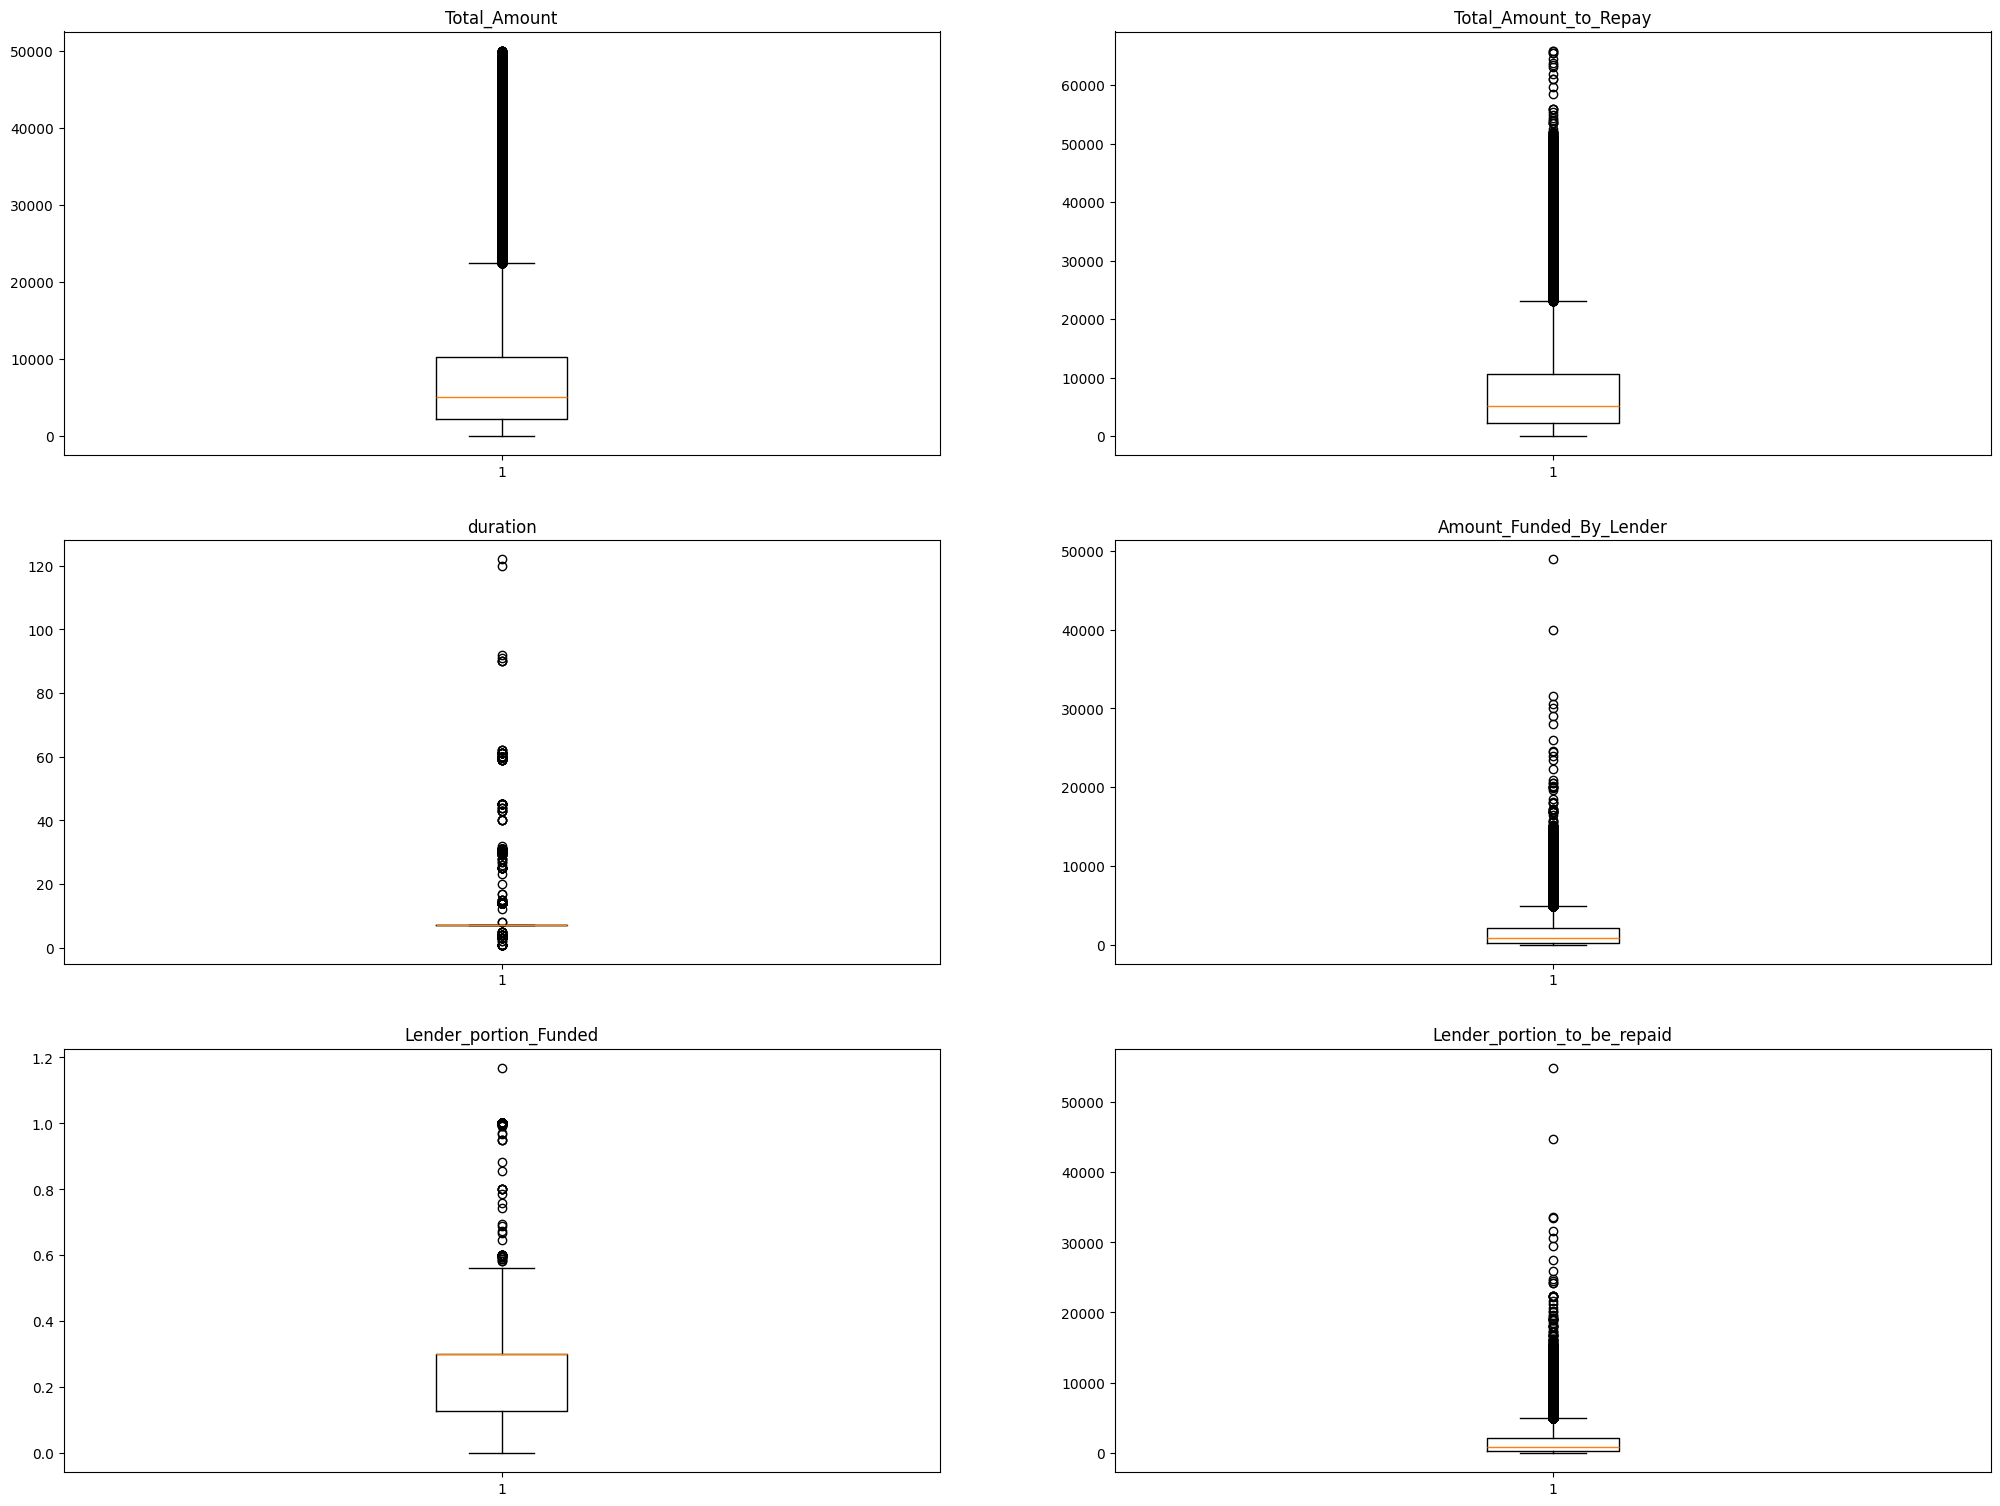

In [12]:
# Violin Plot

fig, ax = plt.subplots(ncols=2, nrows=int(len(NUMERICAL_COLUMNS)/2), figsize=(20, 15))
fig.tight_layout()
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.2, hspace=0.2)

for i, col in enumerate(NUMERICAL_COLUMNS):
    ax[int(i/2), i%2].boxplot(train_df.loc[train_df['Total_Amount']<0.005e7, col])
    ax[int(i/2), i%2].set_title(col)

plt.show()

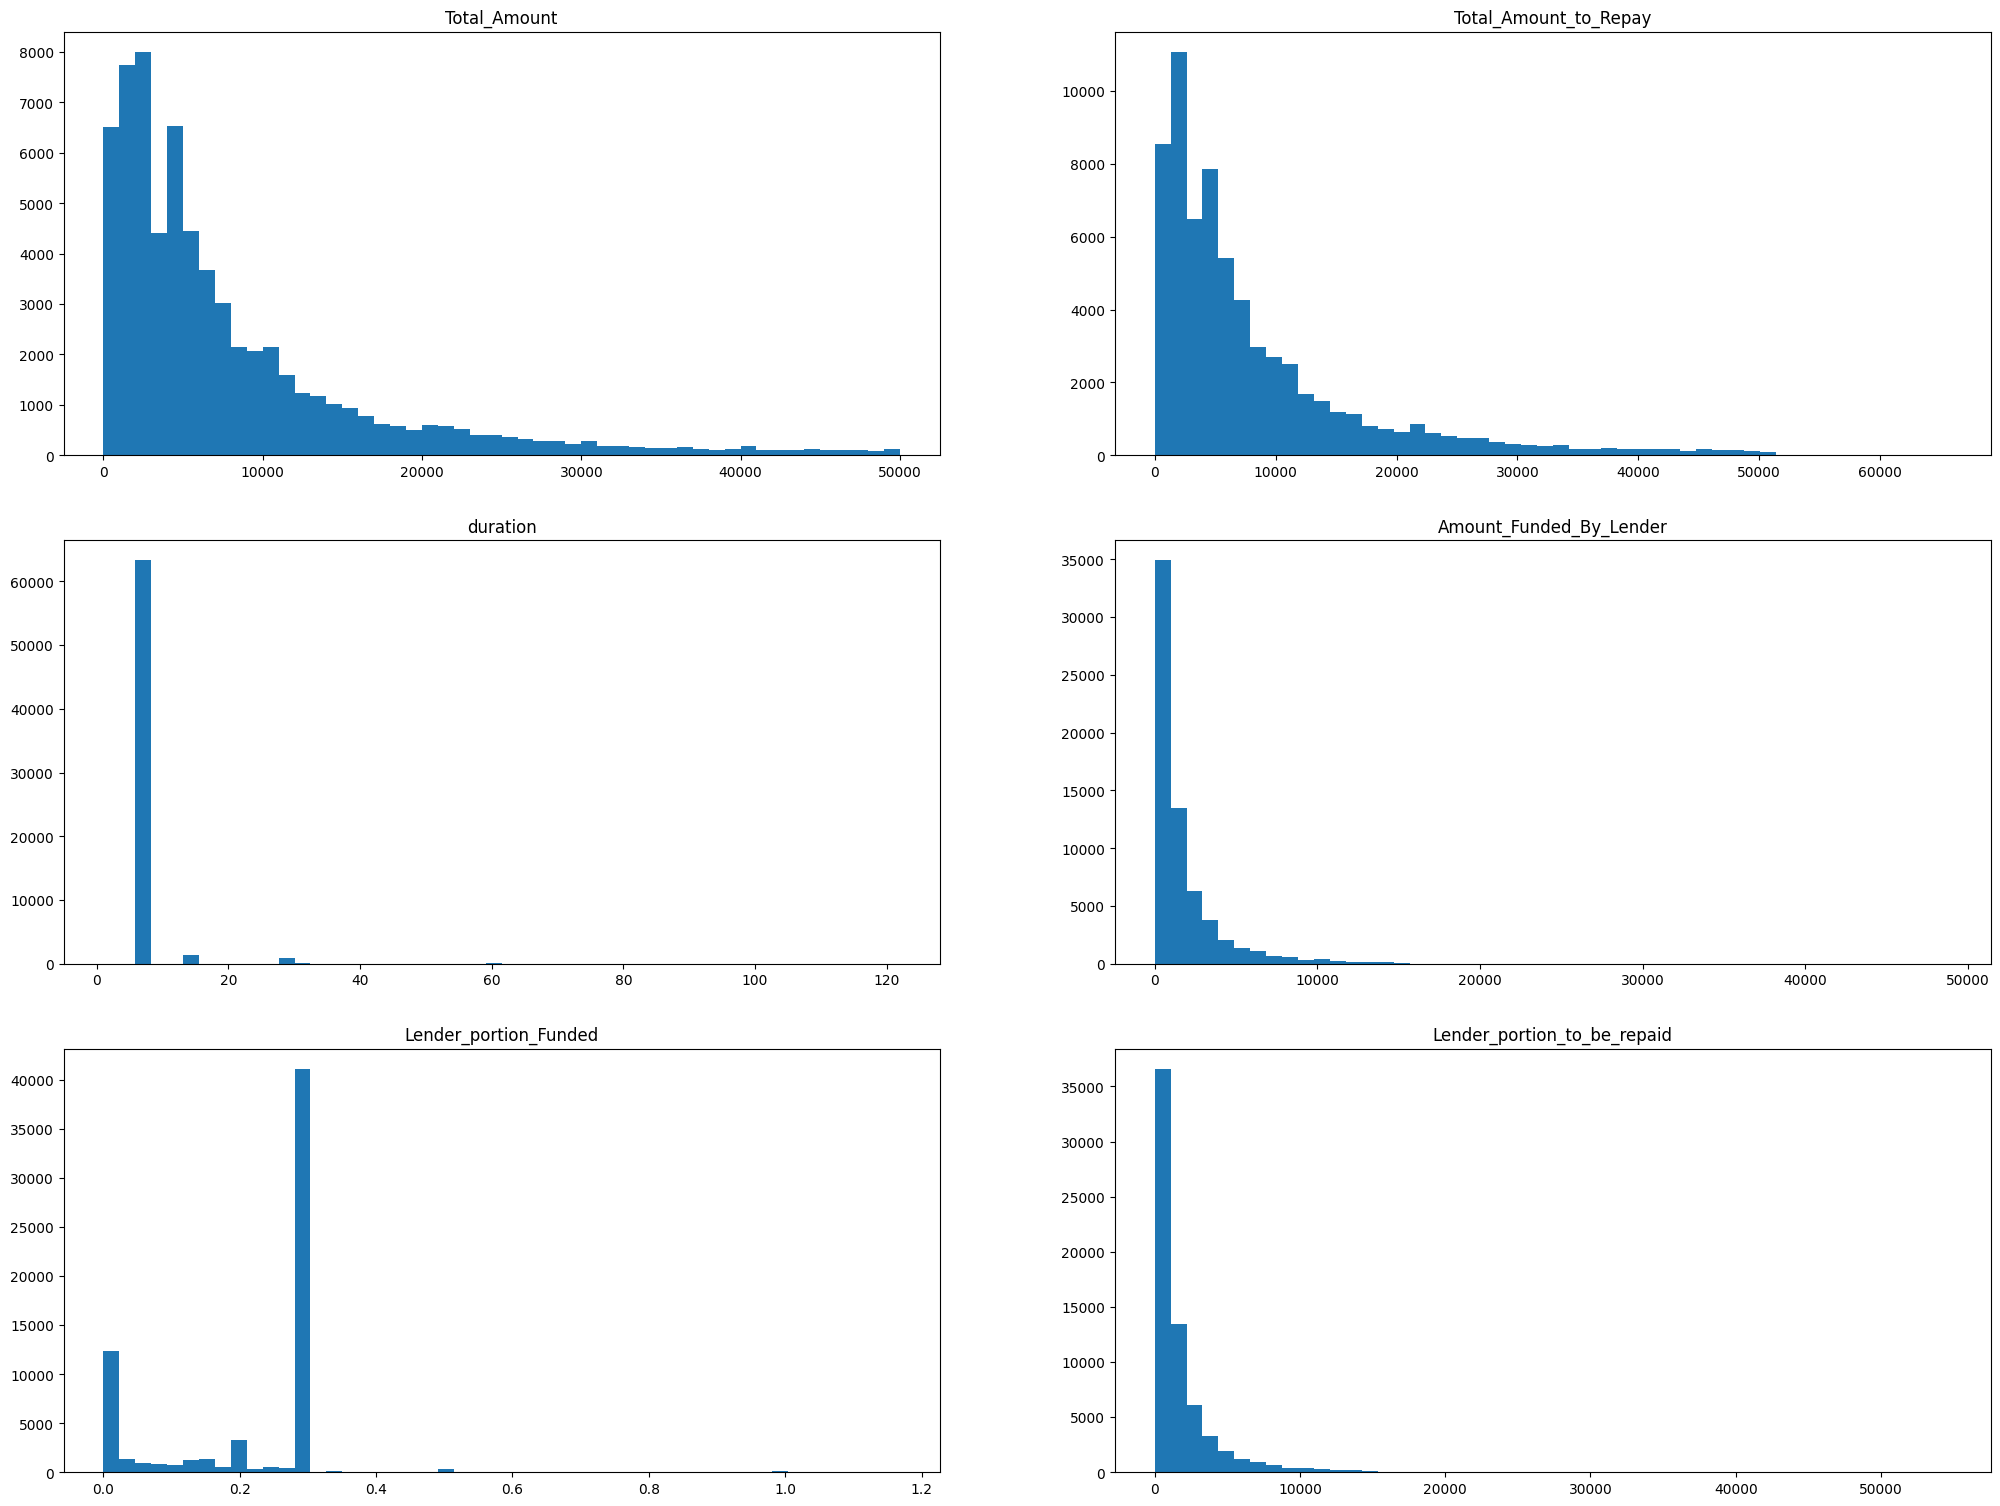

In [13]:
# Histogram Plot

fig, ax = plt.subplots(ncols=2, nrows=int(len(NUMERICAL_COLUMNS)/2), figsize=(20, 15))
fig.tight_layout()
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.2, hspace=0.2)

for i, col in enumerate(NUMERICAL_COLUMNS):
    ax[int(i/2), i%2].hist(train_df.loc[train_df['Total_Amount']<0.005e7, col], bins=50)
    ax[int(i/2), i%2].set_title(col)

plt.show()

In [14]:
train_df['Total_Amount (in $)'] = train_df['Total_Amount'] / train_df['Official exchange rate (LCU per US$, period average)']
train_df['Total_Amount (in $)'].describe()

count     68654.000000
mean        121.904812
std        1164.332317
min           0.015595
25%          19.445813
50%          44.533627
75%          96.522755
max      195136.868199
Name: Total_Amount (in $), dtype: float64

In [32]:
train_df_low = train_df[train_df['Total_Amount']<0.02e7]
train_df_high = train_df[train_df['Total_Amount']>0.02e7]

train_df_high.shape[0], train_df_low.shape[0]

(352, 68281)

### Categorical Variables

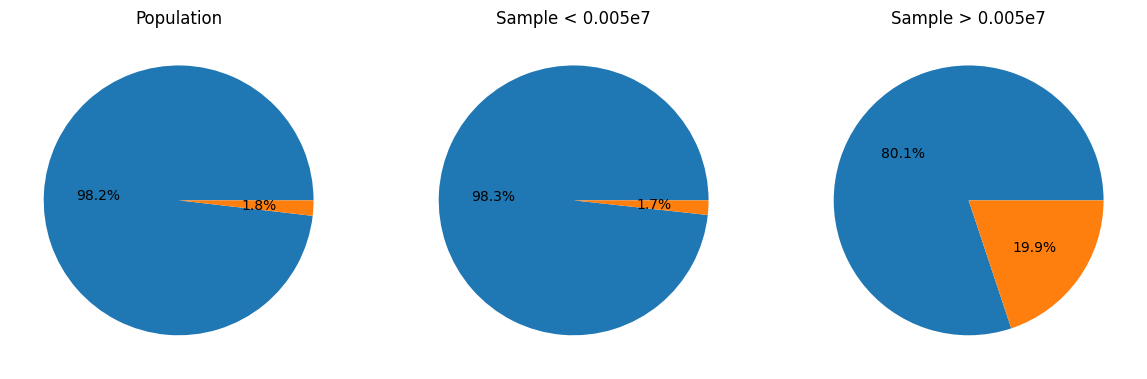

In [31]:
# Percentage of target in our population and samples

fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(12,12))
fig.tight_layout()

ax[0].pie(train_df[TARGET_COLUMN].value_counts(), autopct='%1.1f%%')
ax[0].set_title('Population')

ax[1].pie(train_df_low[TARGET_COLUMN].value_counts(), autopct='%1.1f%%')
ax[1].set_title('Sample < 0.005e7')

ax[2].pie(train_df_high[TARGET_COLUMN].value_counts(), autopct='%1.1f%%')
ax[2].set_title('Sample > 0.005e7')

plt.show()

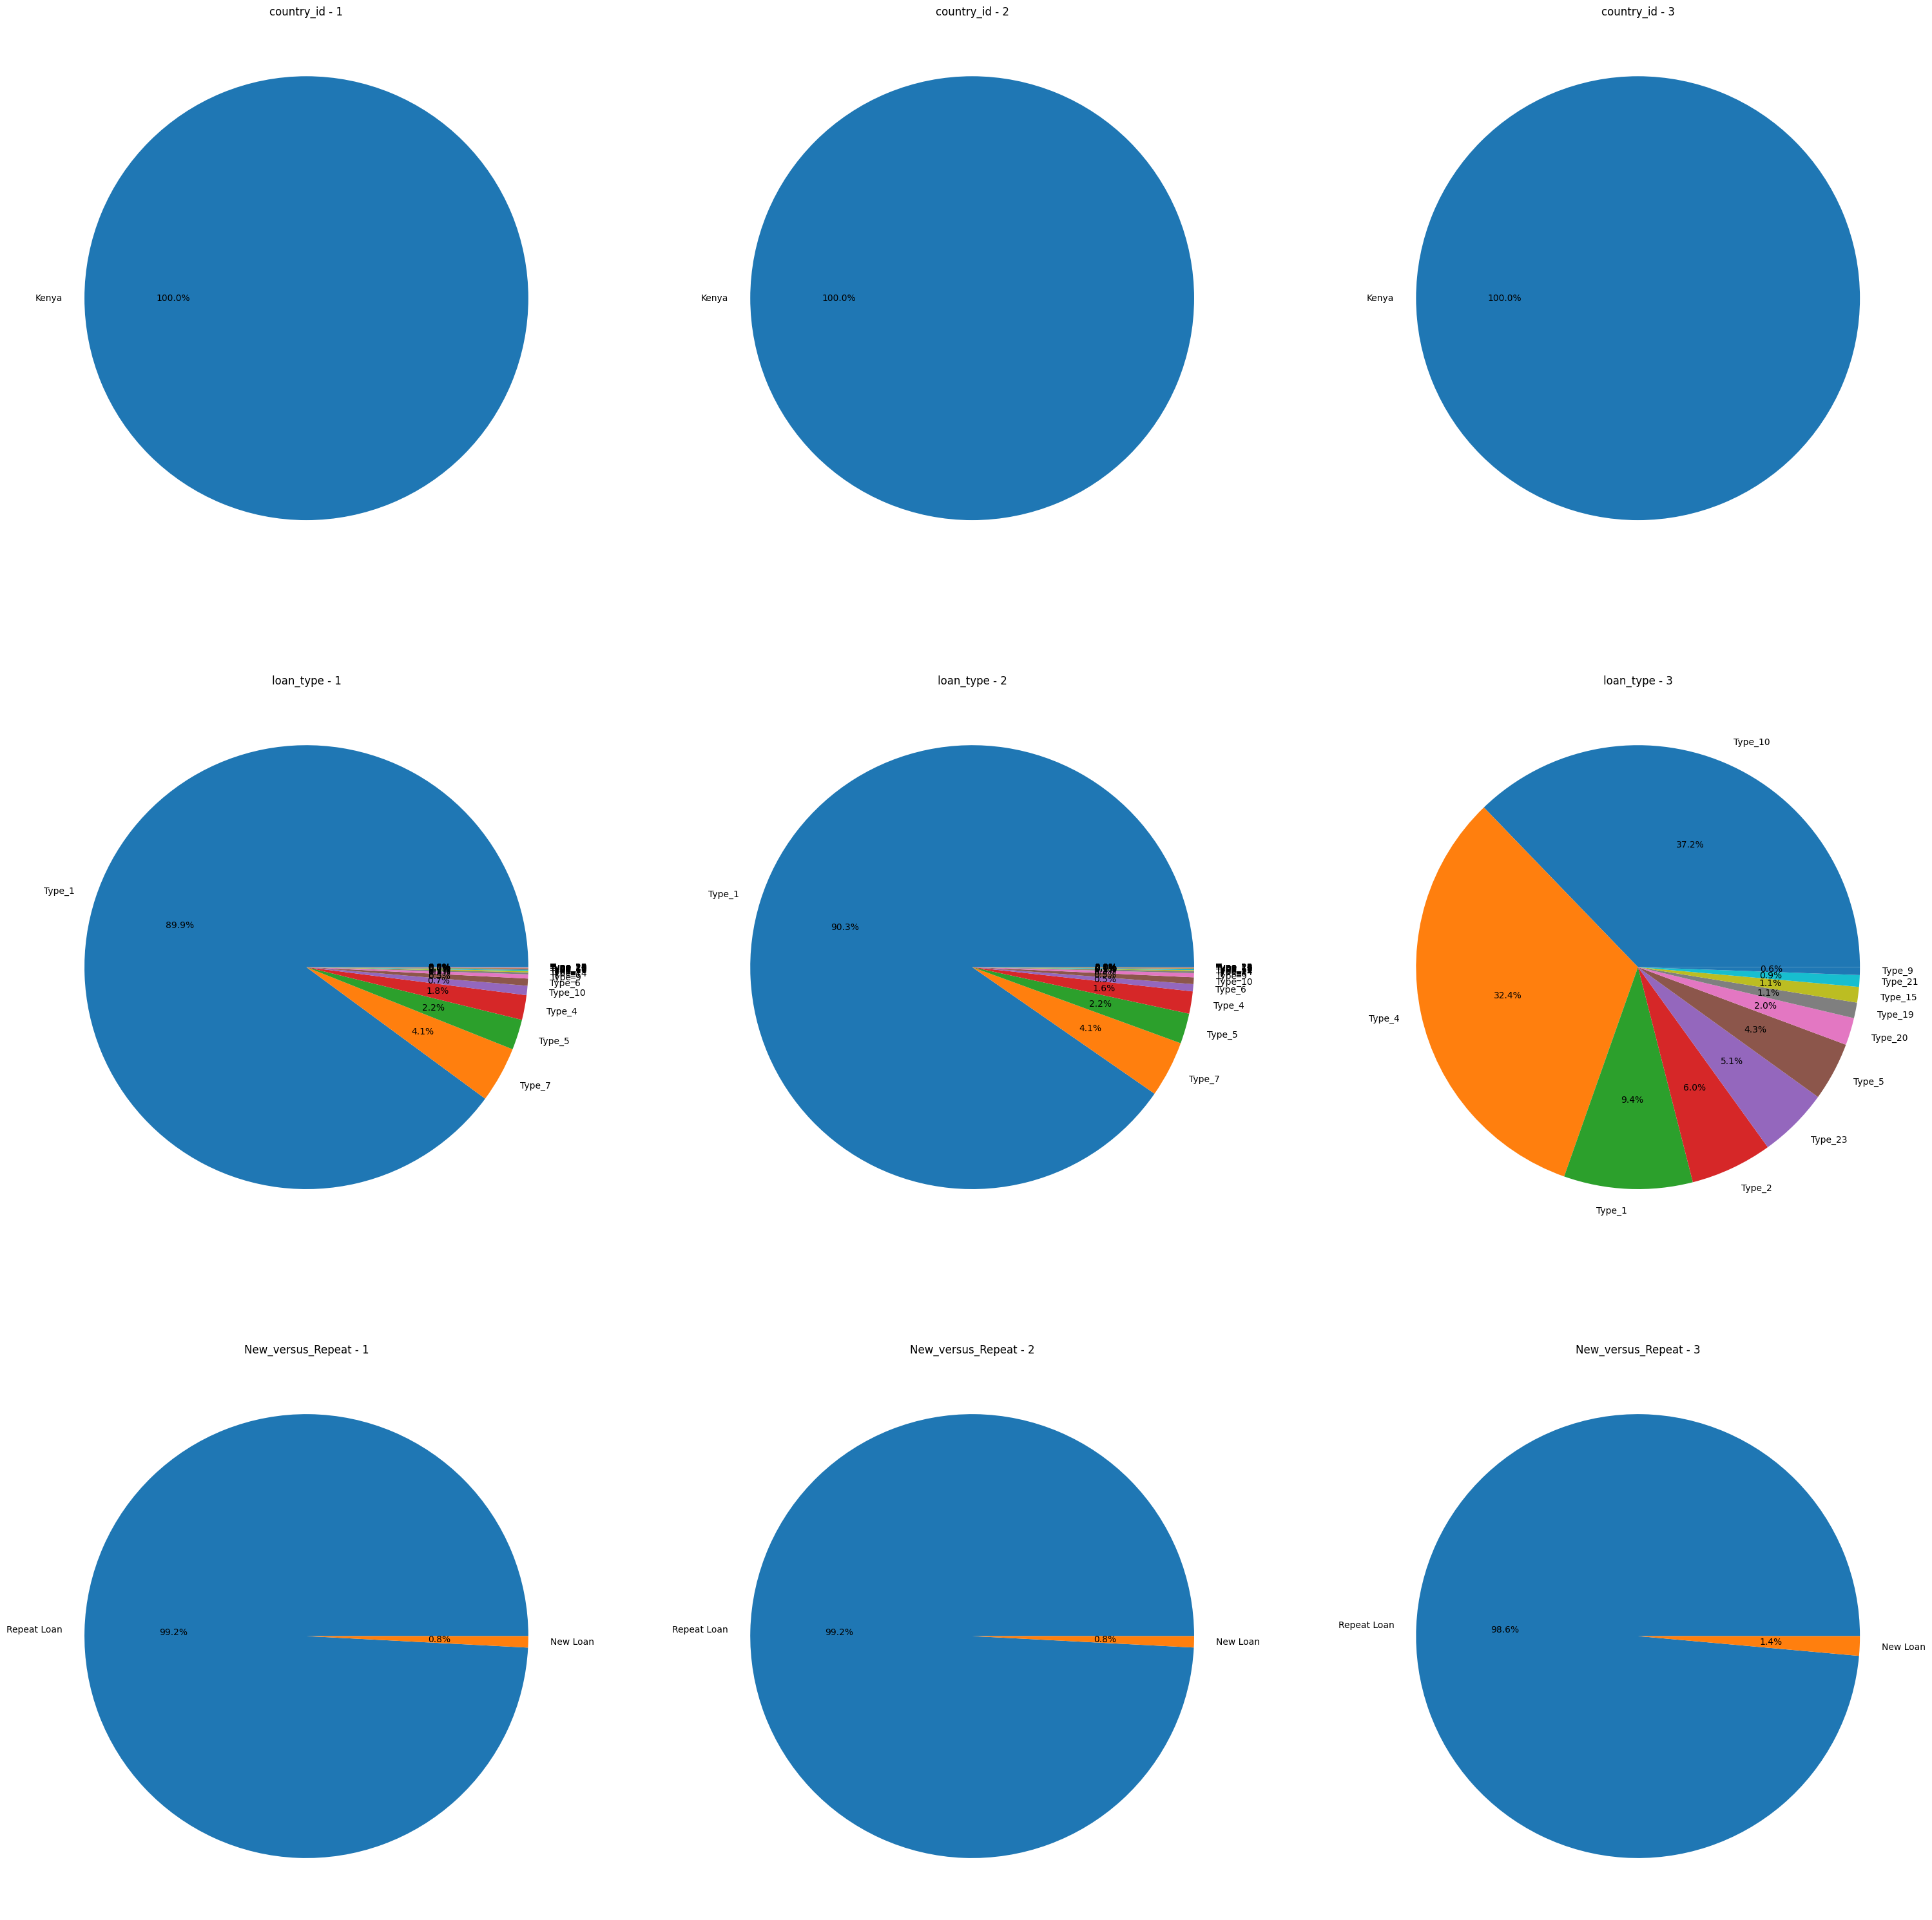

In [44]:
# Pie Plot

fig, ax = plt.subplots(ncols=3, nrows=3, figsize=(30, 30))
fig.tight_layout()
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.2, hspace=0.2)

for i, col in enumerate(CATEGORICAL_COLUMNS):
    for j, df in enumerate([train_df, train_df_low, train_df_high]):
        ax[i, j].pie(df.loc[:, col].value_counts(), labels=df.loc[:, col].value_counts().index, autopct='%1.1f%%')
        ax[i, j].set_title(f'{col} - {j+1}')

plt.show()

In [5]:
print(train_df['loan_type'].unique())

['Type_1' 'Type_7' 'Type_5' 'Type_4' 'Type_6' 'Type_14' 'Type_9' 'Type_10'
 'Type_19' 'Type_16' 'Type_2' 'Type_11' 'Type_23' 'Type_18' 'Type_17'
 'Type_12' 'Type_20' 'Type_13' 'Type_21' 'Type_15' 'Type_24' 'Type_22']


In [6]:
test_df = pd.read_csv(TEST_FILE_PATH)
print(test_df['loan_type'].unique())

['Type_1' 'Type_7' 'Type_3' 'Type_2' 'Type_10' 'Type_6' 'Type_23'
 'Type_14' 'Type_5' 'Type_4' 'Type_17' 'Type_9' 'Type_12' 'Type_8'
 'Type_11' 'Type_18' 'Type_24' 'Type_22' 'Type_20' 'Type_15' 'Type_21'
 'Type_13']


In [7]:
train_df = train_df.drop(['country_id', 'disbursement_date', 'due_date'], axis=1)
train_df

,ID,loan_type,Total_Amount,Total_Amount_to_Repay,duration,New_versus_Repeat,Amount_Funded_By_Lender,Lender_portion_Funded,Lender_portion_to_be_repaid,target,"Inflation, consumer prices (annual %)","Official exchange rate (LCU per US$, period average)",Average precipitation in depth (mm per year),Unemployment rate
0,ID_266671248032267278,Type_1,8448.0,8448.0,7,Repeat Loan,120.85,0.014305,121.0,0,7.659863,117.865989,630.0,5.805
1,ID_248919228515267278,Type_1,25895.0,25979.0,7,Repeat Loan,7768.50,0.300000,7794.0,0,7.659863,117.865989,630.0,5.805
2,ID_308486370501251804,Type_7,6900.0,7142.0,7,Repeat Loan,1380.00,0.200000,1428.0,0,4.300000,128.250000,630.0,5.700
3,ID_266004285009267278,Type_1,8958.0,9233.0,7,Repeat Loan,2687.40,0.300000,2770.0,0,7.659863,117.865989,630.0,5.805
4,ID_253803305312267278,Type_1,4564.0,4728.0,7,Repeat Loan,1369.20,0.300000,1418.0,0,7.659863,117.865989,630.0,5.805
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68649,ID_244559228408267278,Type_1,1460.0,1515.0,7,Repeat Loan,438.00,0.300000,455.0,0,7.659863,117.865989,630.0,5.805
68650,ID_260062217784267278,Type_1,5029.0,5116.0,7,Repeat Loan,1508.70,0.300000,1535.0,0,7.659863,117.865989,630.0,5.805
68651,ID_259137216701267278,Type_1,5289.0,5289.0,7,Repeat Loan,1586.70,0.300000,1587.0,0,7.659863,117.865989,630.0,5.805
68652,ID_266801303201267278,Type_1,3334.0,3334.0,7,Repeat Loan,741.09,0.222283,741.0,0,7.659863,117.865989,630.0,5.805


In [8]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score

In [9]:
CATEGORICAL_COLUMNS = ['loan_type', 'New_versus_Repeat']

In [10]:
loan_type_encoder = OneHotEncoder(categories=[[f'Type_{i}' for i in range(1, 26)]])
new_vs_repeat_encoder = OneHotEncoder(drop='if_binary')
new_vs_repeat_encoder.fit(train_df['New_versus_Repeat'].to_numpy().reshape(-1, 1))

OneHotEncoder(drop='if_binary')

In [11]:
train_df['New_versus_Repeat'] = new_vs_repeat_encoder.transform(train_df['New_versus_Repeat'].to_numpy().reshape(-1, 1)).toarray()
train_df

,ID,loan_type,Total_Amount,Total_Amount_to_Repay,duration,New_versus_Repeat,Amount_Funded_By_Lender,Lender_portion_Funded,Lender_portion_to_be_repaid,target,"Inflation, consumer prices (annual %)","Official exchange rate (LCU per US$, period average)",Average precipitation in depth (mm per year),Unemployment rate
0,ID_266671248032267278,Type_1,8448.0,8448.0,7,1.0,120.85,0.014305,121.0,0,7.659863,117.865989,630.0,5.805
1,ID_248919228515267278,Type_1,25895.0,25979.0,7,1.0,7768.50,0.300000,7794.0,0,7.659863,117.865989,630.0,5.805
2,ID_308486370501251804,Type_7,6900.0,7142.0,7,1.0,1380.00,0.200000,1428.0,0,4.300000,128.250000,630.0,5.700
3,ID_266004285009267278,Type_1,8958.0,9233.0,7,1.0,2687.40,0.300000,2770.0,0,7.659863,117.865989,630.0,5.805
4,ID_253803305312267278,Type_1,4564.0,4728.0,7,1.0,1369.20,0.300000,1418.0,0,7.659863,117.865989,630.0,5.805
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68649,ID_244559228408267278,Type_1,1460.0,1515.0,7,1.0,438.00,0.300000,455.0,0,7.659863,117.865989,630.0,5.805
68650,ID_260062217784267278,Type_1,5029.0,5116.0,7,1.0,1508.70,0.300000,1535.0,0,7.659863,117.865989,630.0,5.805
68651,ID_259137216701267278,Type_1,5289.0,5289.0,7,1.0,1586.70,0.300000,1587.0,0,7.659863,117.865989,630.0,5.805
68652,ID_266801303201267278,Type_1,3334.0,3334.0,7,1.0,741.09,0.222283,741.0,0,7.659863,117.865989,630.0,5.805


In [12]:
loan_type_encoder.fit(train_df['loan_type'].to_numpy().reshape(-1, 1))
loan_type_encoder.transform(train_df['loan_type'].to_numpy().reshape(-1, 1)).toarray()

array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.]], shape=(68654, 25))

In [13]:
loan_type_encoder.categories

[['Type_1',
  'Type_2',
  'Type_3',
  'Type_4',
  'Type_5',
  'Type_6',
  'Type_7',
  'Type_8',
  'Type_9',
  'Type_10',
  'Type_11',
  'Type_12',
  'Type_13',
  'Type_14',
  'Type_15',
  'Type_16',
  'Type_17',
  'Type_18',
  'Type_19',
  'Type_20',
  'Type_21',
  'Type_22',
  'Type_23',
  'Type_24',
  'Type_25']]

In [14]:
column_names = loan_type_encoder.get_feature_names_out(['loan_type'])
encoded_df = pd.DataFrame(loan_type_encoder.transform(train_df['loan_type'].to_numpy().reshape(-1, 1)).toarray(), columns=column_names, index=train_df.index)
train_df = pd.concat([train_df, encoded_df], axis=1)
train_df

,ID,loan_type,Total_Amount,Total_Amount_to_Repay,duration,New_versus_Repeat,Amount_Funded_By_Lender,Lender_portion_Funded,Lender_portion_to_be_repaid,target,...,loan_type_Type_16,loan_type_Type_17,loan_type_Type_18,loan_type_Type_19,loan_type_Type_20,loan_type_Type_21,loan_type_Type_22,loan_type_Type_23,loan_type_Type_24,loan_type_Type_25
0,ID_266671248032267278,Type_1,8448.0,8448.0,7,1.0,120.85,0.014305,121.0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,ID_248919228515267278,Type_1,25895.0,25979.0,7,1.0,7768.50,0.300000,7794.0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,ID_308486370501251804,Type_7,6900.0,7142.0,7,1.0,1380.00,0.200000,1428.0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,ID_266004285009267278,Type_1,8958.0,9233.0,7,1.0,2687.40,0.300000,2770.0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,ID_253803305312267278,Type_1,4564.0,4728.0,7,1.0,1369.20,0.300000,1418.0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68649,ID_244559228408267278,Type_1,1460.0,1515.0,7,1.0,438.00,0.300000,455.0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
68650,ID_260062217784267278,Type_1,5029.0,5116.0,7,1.0,1508.70,0.300000,1535.0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
68651,ID_259137216701267278,Type_1,5289.0,5289.0,7,1.0,1586.70,0.300000,1587.0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
68652,ID_266801303201267278,Type_1,3334.0,3334.0,7,1.0,741.09,0.222283,741.0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [15]:
train_df = train_df.drop(['ID', 'loan_type'], axis=1)
train_df

,Total_Amount,Total_Amount_to_Repay,duration,New_versus_Repeat,Amount_Funded_By_Lender,Lender_portion_Funded,Lender_portion_to_be_repaid,target,"Inflation, consumer prices (annual %)","Official exchange rate (LCU per US$, period average)",...,loan_type_Type_16,loan_type_Type_17,loan_type_Type_18,loan_type_Type_19,loan_type_Type_20,loan_type_Type_21,loan_type_Type_22,loan_type_Type_23,loan_type_Type_24,loan_type_Type_25
0,8448.0,8448.0,7,1.0,120.85,0.014305,121.0,0,7.659863,117.865989,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,25895.0,25979.0,7,1.0,7768.50,0.300000,7794.0,0,7.659863,117.865989,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,6900.0,7142.0,7,1.0,1380.00,0.200000,1428.0,0,4.300000,128.250000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,8958.0,9233.0,7,1.0,2687.40,0.300000,2770.0,0,7.659863,117.865989,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4564.0,4728.0,7,1.0,1369.20,0.300000,1418.0,0,7.659863,117.865989,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68649,1460.0,1515.0,7,1.0,438.00,0.300000,455.0,0,7.659863,117.865989,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
68650,5029.0,5116.0,7,1.0,1508.70,0.300000,1535.0,0,7.659863,117.865989,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
68651,5289.0,5289.0,7,1.0,1586.70,0.300000,1587.0,0,7.659863,117.865989,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
68652,3334.0,3334.0,7,1.0,741.09,0.222283,741.0,0,7.659863,117.865989,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [16]:
PREDICTOR_COLUMNS = NUMERICAL_COLUMNS + ['New_versus_Repeat'] + loan_type_encoder.get_feature_names_out(['loan_type']).tolist()
PREDICTOR_COLUMNS

['Total_Amount',
 'Total_Amount_to_Repay',
 'duration',
 'Amount_Funded_By_Lender',
 'Lender_portion_Funded',
 'Lender_portion_to_be_repaid',
 'New_versus_Repeat',
 'loan_type_Type_1',
 'loan_type_Type_2',
 'loan_type_Type_3',
 'loan_type_Type_4',
 'loan_type_Type_5',
 'loan_type_Type_6',
 'loan_type_Type_7',
 'loan_type_Type_8',
 'loan_type_Type_9',
 'loan_type_Type_10',
 'loan_type_Type_11',
 'loan_type_Type_12',
 'loan_type_Type_13',
 'loan_type_Type_14',
 'loan_type_Type_15',
 'loan_type_Type_16',
 'loan_type_Type_17',
 'loan_type_Type_18',
 'loan_type_Type_19',
 'loan_type_Type_20',
 'loan_type_Type_21',
 'loan_type_Type_22',
 'loan_type_Type_23',
 'loan_type_Type_24',
 'loan_type_Type_25']

In [17]:
x, y = train_df[PREDICTOR_COLUMNS], train_df[TARGET_COLUMN]
trainX, testX, trainY, testY = train_test_split(x, y, stratify=y)
trainX

,Total_Amount,Total_Amount_to_Repay,duration,Amount_Funded_By_Lender,Lender_portion_Funded,Lender_portion_to_be_repaid,New_versus_Repeat,loan_type_Type_1,loan_type_Type_2,loan_type_Type_3,...,loan_type_Type_16,loan_type_Type_17,loan_type_Type_18,loan_type_Type_19,loan_type_Type_20,loan_type_Type_21,loan_type_Type_22,loan_type_Type_23,loan_type_Type_24,loan_type_Type_25
20969,4049.0,4078.0,7,789.75,0.195048,795.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
42188,2420.0,2433.0,7,726.00,0.300000,730.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
23480,225.0,225.0,7,67.50,0.300000,68.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
48751,3575.0,3826.0,7,715.00,0.200000,765.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14610,10839.0,10924.0,7,3251.70,0.300000,3277.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10394,5289.0,5289.0,7,1586.70,0.300000,1587.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
32825,2040.0,2081.0,7,326.00,0.159804,333.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
26914,52750.0,52750.0,7,15825.00,0.300000,15825.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
20345,10000.0,10700.0,31,1333.00,0.133300,1426.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [18]:
import africa_loan_defaulting.modeling as modeling

In [19]:
modeling.train(trainX, trainY, testX, testY)

INFO:root:Successfully trained and saved model
INFO:root:Train set:
         Accuracy Score: 0.9960769081375024,
         Recall Score: 0.8229056203605515,
         Precision Score: 0.9568434032059187,
         F1 Score: 0.8848346636259977

INFO:root:Train set:
         Accuracy Score: 0.9921929620135167,
         Recall Score: 0.6603174603174603,
         Precision Score: 0.8851063829787233,
         F1 Score: 0.7563636363636363



In [21]:
testX

,Total_Amount,Total_Amount_to_Repay,duration,Amount_Funded_By_Lender,Lender_portion_Funded,Lender_portion_to_be_repaid,New_versus_Repeat,loan_type_Type_1,loan_type_Type_2,loan_type_Type_3,...,loan_type_Type_16,loan_type_Type_17,loan_type_Type_18,loan_type_Type_19,loan_type_Type_20,loan_type_Type_21,loan_type_Type_22,loan_type_Type_23,loan_type_Type_24,loan_type_Type_25
19142,8670.0,8981.0,7,2219.60,0.256009,2299.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
62081,4420.0,4575.0,7,884.00,0.200000,915.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
51064,5871.0,6052.0,7,1761.30,0.300000,1816.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
31332,4699.0,4742.0,7,0.00,0.000000,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3333,3641.0,3641.0,7,287.86,0.079061,288.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40347,3519.0,3620.0,7,1055.70,0.300000,1086.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
45916,8678.0,8858.0,7,2603.40,0.300000,2657.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
66539,20000.0,21400.0,30,3200.00,0.160000,3424.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
27325,5609.0,5609.0,7,1682.70,0.300000,1683.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [20]:
preds = modeling.predict(testX)
preds

INFO:root:Model Successfully Loaded


KeyError: 'ID'

In [24]:
train_preds = bst.predict(trainX)
test_preds = bst.predict(testX)

In [29]:
print(f'Train set:\n \
        Accuracy Score: {accuracy_score(trainY, train_preds)},\n \
        Recall Score: {recall_score(trainY, train_preds)},\n \
        Precision Score: {precision_score(trainY, train_preds)},\n \
        F1 Score: {f1_score(trainY, train_preds)}\n')

print(f'Test set:\n \
        Accuracy Score: {accuracy_score(testY, test_preds)},\n \
        Recall Score: {recall_score(testY, test_preds)},\n \
        Precision Score: {precision_score(testY, test_preds)},\n \
        F1 Score: {f1_score(testY, test_preds)}\n')

Train set:
         Accuracy Score: 0.996290541852787,
         Recall Score: 0.8218451749734889,
         Precision Score: 0.9711779448621554,
         F1 Score: 0.8902929350947731

Test set:
         Accuracy Score: 0.9917268701934281,
         Recall Score: 0.6507936507936508,
         Precision Score: 0.8649789029535865,
         F1 Score: 0.7427536231884058



In [34]:
test_df = pd.read_csv(RAW_TEST_FILE_PATH)
test_df

,ID,customer_id,country_id,tbl_loan_id,lender_id,loan_type,Total_Amount,Total_Amount_to_Repay,disbursement_date,due_date,duration,New_versus_Repeat,Amount_Funded_By_Lender,Lender_portion_Funded,Lender_portion_to_be_repaid
0,ID_269404226088267278,269404,Kenya,226088,267278,Type_1,1919.00,1989.00,2022-07-27,2022-08-03,7,Repeat Loan,575.70,0.300000,597.00
1,ID_255356300042267278,255356,Kenya,300042,267278,Type_1,2138.00,2153.00,2022-11-16,2022-11-23,7,Repeat Loan,0.00,0.000000,0.00
2,ID_257026243764267278,257026,Kenya,243764,267278,Type_1,8254.00,8304.00,2022-08-24,2022-08-31,7,Repeat Loan,207.00,0.025079,208.00
3,ID_264617299409267278,264617,Kenya,299409,267278,Type_1,3379.00,3379.00,2022-11-15,2022-11-22,7,Repeat Loan,1013.70,0.300000,1014.00
4,ID_247613296713267278,247613,Kenya,296713,267278,Type_1,120.00,120.00,2022-11-10,2022-11-17,7,Repeat Loan,36.00,0.300000,36.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18589,ID_297596365331297183,297596,Ghana,365331,297183,Type_3,1730.41,1782.32,2023-02-09,2023-02-16,7,Repeat Loan,269.41,0.155689,279.77
18590,ID_259715231897267278,259715,Kenya,231897,267278,Type_1,1534.00,1534.00,2022-08-04,2022-08-11,7,Repeat Loan,460.20,0.300000,460.00
18591,ID_296701364008297183,296701,Ghana,364008,297183,Type_3,1372.21,1413.30,2022-06-23,2022-06-30,7,Repeat Loan,178.67,0.130208,178.67
18592,ID_268271242864267278,268271,Kenya,242864,267278,Type_1,5608.00,5781.00,2022-08-23,2022-08-30,7,Repeat Loan,0.00,0.000000,0.00


In [35]:
test_df = test_df.drop(['country_id', 'disbursement_date', 'due_date', 'customer_id', 'tbl_loan_id', 'lender_id', 'ID'], axis=1)
test_df

,loan_type,Total_Amount,Total_Amount_to_Repay,duration,New_versus_Repeat,Amount_Funded_By_Lender,Lender_portion_Funded,Lender_portion_to_be_repaid
0,Type_1,1919.00,1989.00,7,Repeat Loan,575.70,0.300000,597.00
1,Type_1,2138.00,2153.00,7,Repeat Loan,0.00,0.000000,0.00
2,Type_1,8254.00,8304.00,7,Repeat Loan,207.00,0.025079,208.00
3,Type_1,3379.00,3379.00,7,Repeat Loan,1013.70,0.300000,1014.00
4,Type_1,120.00,120.00,7,Repeat Loan,36.00,0.300000,36.00
...,...,...,...,...,...,...,...,...
18589,Type_3,1730.41,1782.32,7,Repeat Loan,269.41,0.155689,279.77
18590,Type_1,1534.00,1534.00,7,Repeat Loan,460.20,0.300000,460.00
18591,Type_3,1372.21,1413.30,7,Repeat Loan,178.67,0.130208,178.67
18592,Type_1,5608.00,5781.00,7,Repeat Loan,0.00,0.000000,0.00


In [36]:
test_df['New_versus_Repeat'] = new_vs_repeat_encoder.transform(test_df['New_versus_Repeat'].to_numpy().reshape(-1, 1)).toarray()
encoded_df = pd.DataFrame(loan_type_encoder.transform(test_df['loan_type'].to_numpy().reshape(-1, 1)).toarray(), columns=column_names, index=test_df.index)
test_df = pd.concat([test_df, encoded_df], axis=1)
test_df

,loan_type,Total_Amount,Total_Amount_to_Repay,duration,New_versus_Repeat,Amount_Funded_By_Lender,Lender_portion_Funded,Lender_portion_to_be_repaid,loan_type_Type_1,loan_type_Type_2,...,loan_type_Type_16,loan_type_Type_17,loan_type_Type_18,loan_type_Type_19,loan_type_Type_20,loan_type_Type_21,loan_type_Type_22,loan_type_Type_23,loan_type_Type_24,loan_type_Type_25
0,Type_1,1919.00,1989.00,7,1.0,575.70,0.300000,597.00,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Type_1,2138.00,2153.00,7,1.0,0.00,0.000000,0.00,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Type_1,8254.00,8304.00,7,1.0,207.00,0.025079,208.00,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Type_1,3379.00,3379.00,7,1.0,1013.70,0.300000,1014.00,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Type_1,120.00,120.00,7,1.0,36.00,0.300000,36.00,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18589,Type_3,1730.41,1782.32,7,1.0,269.41,0.155689,279.77,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
18590,Type_1,1534.00,1534.00,7,1.0,460.20,0.300000,460.00,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
18591,Type_3,1372.21,1413.30,7,1.0,178.67,0.130208,178.67,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
18592,Type_1,5608.00,5781.00,7,1.0,0.00,0.000000,0.00,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [38]:
test_df = test_df.drop(['loan_type'], axis=1)

In [39]:
test_df = test_df[PREDICTOR_COLUMNS]
test_df

,Total_Amount,Total_Amount_to_Repay,duration,Amount_Funded_By_Lender,Lender_portion_Funded,Lender_portion_to_be_repaid,New_versus_Repeat,loan_type_Type_1,loan_type_Type_2,loan_type_Type_3,...,loan_type_Type_16,loan_type_Type_17,loan_type_Type_18,loan_type_Type_19,loan_type_Type_20,loan_type_Type_21,loan_type_Type_22,loan_type_Type_23,loan_type_Type_24,loan_type_Type_25
0,1919.00,1989.00,7,575.70,0.300000,597.00,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2138.00,2153.00,7,0.00,0.000000,0.00,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,8254.00,8304.00,7,207.00,0.025079,208.00,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3379.00,3379.00,7,1013.70,0.300000,1014.00,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,120.00,120.00,7,36.00,0.300000,36.00,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18589,1730.41,1782.32,7,269.41,0.155689,279.77,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
18590,1534.00,1534.00,7,460.20,0.300000,460.00,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
18591,1372.21,1413.30,7,178.67,0.130208,178.67,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
18592,5608.00,5781.00,7,0.00,0.000000,0.00,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [40]:
preds = bst.predict(test_df)
preds

array([0, 0, 0, ..., 0, 0, 0], shape=(18594,))

In [44]:
test_df2 = pd.read_csv(RAW_TEST_FILE_PATH)

submission = pd.DataFrame({
    'ID': test_df2['ID'],
    'Target': preds
})
submission = submission.set_index('ID')
submission

,Target
ID,
ID_269404226088267278,0
ID_255356300042267278,0
ID_257026243764267278,0
ID_264617299409267278,0
ID_247613296713267278,0
...,...
ID_297596365331297183,0
ID_259715231897267278,0
ID_296701364008297183,0


In [46]:
submission.to_csv(SUBMISSION_PATH / 'submission.csv')